In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

import datetime

import warnings
warnings.filterwarnings('ignore')

%pylab inline

from fbprophet import Prophet

Populating the interactive namespace from numpy and matplotlib


In [16]:
moex = pd.read_csv('moex.me.csv', delimiter = ';', error_bad_lines = False)

In [17]:
moex = moex[['Date', 'High']].rename(columns = {'Date':'ds', 'High':'y'})

In [18]:
moex = moex[moex.y.notna()]

In [19]:
model = Prophet(daily_seasonality = False, yearly_seasonality = False, weekly_seasonality = False)
model.fit(moex[moex.y.notna()])
yhat = model.predict(moex).yhat

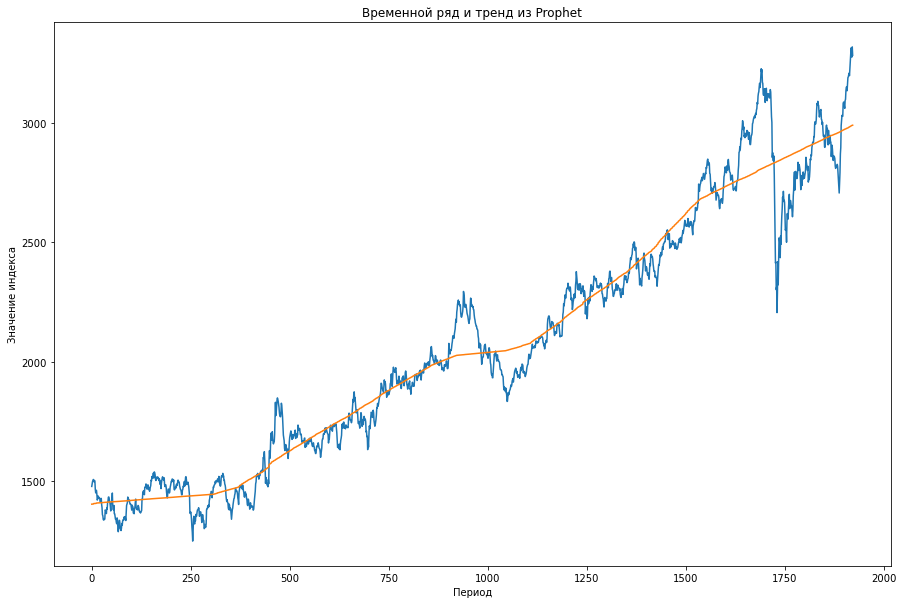

In [20]:
plt.figure(figsize = (15, 10))
plt.title('Временной ряд и тренд из Prophet')
plt.xlabel('Период')
plt.ylabel('Значение индекса')
moex.y.plot()
yhat.plot()
plt.show()

Можно добавить сезонности:

In [21]:
model = Prophet(daily_seasonality = False, yearly_seasonality = False, weekly_seasonality = False)
model.add_seasonality(name='yearly', period=365, fourier_order=10)
model.add_seasonality(name='weekly', period=5, fourier_order=2)
model.add_seasonality(name='monthly', period=30, fourier_order=40)
model.fit(moex[moex.y.notna()])
yhat = model.predict(moex).yhat

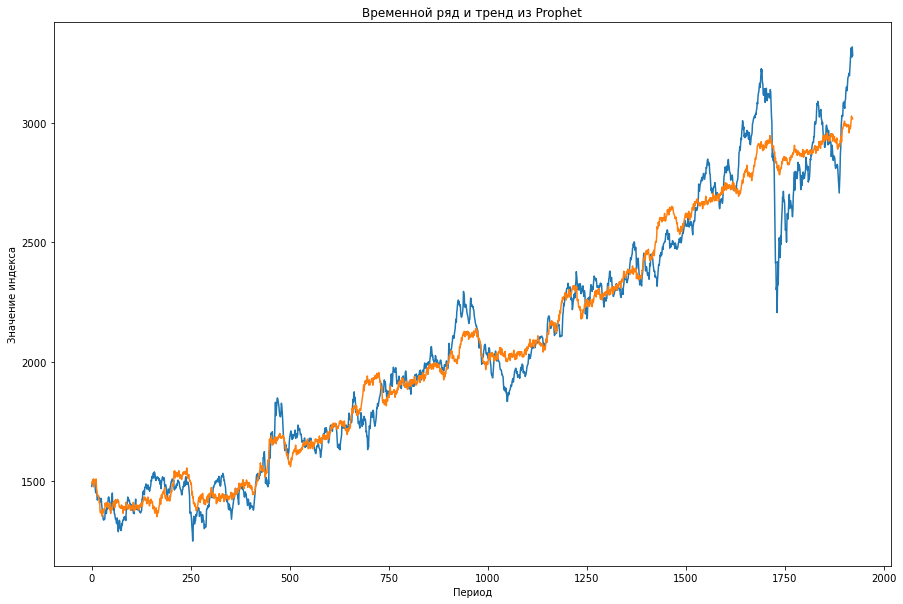

In [22]:
plt.figure(figsize = (15, 10))
plt.title('Временной ряд и тренд из Prophet')
plt.xlabel('Период')
plt.ylabel('Значение индекса')
moex.y.plot()
yhat.plot()
plt.show()